<a href="https://colab.research.google.com/github/nadiakoz/discretemath/blob/main/Report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== 동치 관계 판별 프로그램 (Equivalence Relation Checker) ===
Enter a 5x5 relation matrix (rows of 5 integers 0 or 1).
Row 1: 0 1 0 1 0
Row 2: 0 0 0 1 0
Row 3: 0 0 1 0 0
Row 4: 1 0 0 1 0
Row 5: 0 0 0 0 0
Original relation matrix:
    1  2  3  4  5
 1  0  1  0  1  0
 2  0  0  0  1  0
 3  0  0  1  0  0
 4  1  0  0  1  0
 5  0  0  0  0  0



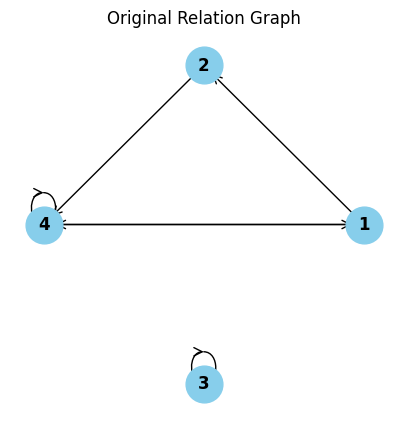

Property check results:
  Reflexive:  ❌ No
  Symmetric:  ❌ No
  Transitive: ❌ No

❌ This relation is NOT an equivalence relation.

After Reflexive Closure:
    1  2  3  4  5
 1  1  1  0  1  0
 2  0  1  0  1  0
 3  0  0  1  0  0
 4  1  0  0  1  0
 5  0  0  0  0  1



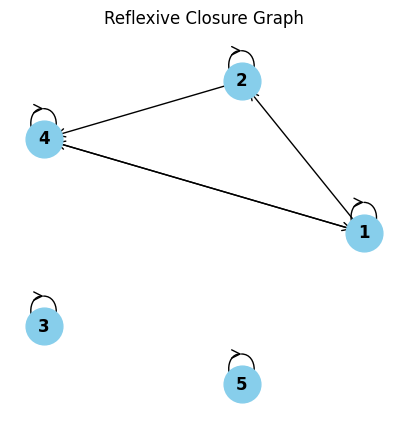

Property check results:
  Reflexive:  ✅ Yes
  Symmetric:  ❌ No
  Transitive: ❌ No

❌ This relation is NOT an equivalence relation.

After Symmetric Closure:
    1  2  3  4  5
 1  1  1  0  1  0
 2  1  1  0  1  0
 3  0  0  1  0  0
 4  1  1  0  1  0
 5  0  0  0  0  1



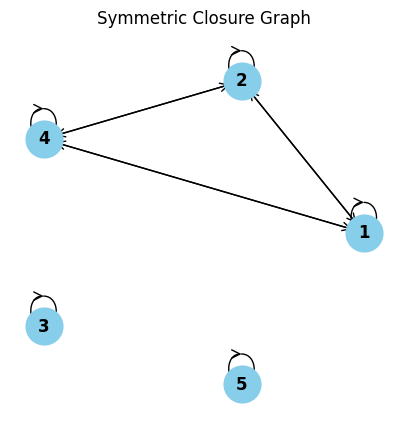

Property check results:
  Reflexive:  ✅ Yes
  Symmetric:  ✅ Yes
  Transitive: ✅ Yes

✅ This relation IS an equivalence relation.

Equivalence classes:
  {1, 2, 4}
  {3}
  {5}
Final check after closures:
Property check results:
  Reflexive:  ✅ Yes
  Symmetric:  ✅ Yes
  Transitive: ✅ Yes

✅ This relation IS an equivalence relation.

Equivalence classes:
  {1, 2, 4}
  {3}
  {5}

✅ Final relation is equivalence. Equivalence classes:
  {1, 2, 4}
  {3}
  {5}


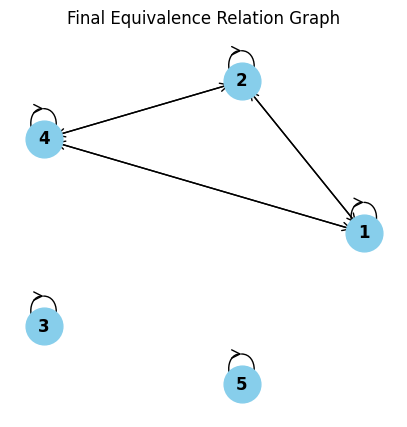


Program finished.


In [1]:
from copy import deepcopy
import networkx as nx
import matplotlib.pyplot as plt

N = 5
ELEMENTS = list(range(1, N + 1))

# -----------------------------
# 1. 관계 행렬 입력 기능
# -----------------------------
def read_matrix():
    print("Enter a 5x5 relation matrix (rows of 5 integers 0 or 1).")
    mat = [[0] * N for _ in range(N)]
    row = 0
    while row < N:
        try:
            line = input(f"Row {row+1}: ").strip()
            if not line:
                continue
            vals = [int(x) for x in line.split()]
            if len(vals) != N or any(x not in (0, 1) for x in vals):
                print("⚠️ Please enter exactly 5 integers (0 or 1).")
                continue
            mat[row] = vals
            row += 1
        except ValueError:
            print("⚠️ Invalid input, please enter only 0 or 1.")
    return mat


def print_matrix(m, title=None):
    if title:
        print(title)
    print("    " + "  ".join(str(x) for x in ELEMENTS))
    for i in range(N):
        print(f"{ELEMENTS[i]:>2}  " + "  ".join(str(m[i][j]) for j in range(N)))
    print()


# -----------------------------
# 2. 관계의 성질 판별 기능
# -----------------------------
def is_reflexive(m):
    return all(m[i][i] == 1 for i in range(N))


def is_symmetric(m):
    for i in range(N):
        for j in range(N):
            if m[i][j] != m[j][i]:
                return False
    return True


def is_transitive(m):
    for i in range(N):
        for j in range(N):
            if m[i][j]:
                for k in range(N):
                    if m[j][k] and not m[i][k]:
                        return False
    return True


# -----------------------------
# 3. 폐포(Closure) 계산 기능
# -----------------------------
def reflexive_closure(m):
    out = deepcopy(m)
    for i in range(N):
        out[i][i] = 1
    return out


def symmetric_closure(m):
    out = deepcopy(m)
    for i in range(N):
        for j in range(N):
            if out[i][j] == 1:
                out[j][i] = 1
    return out


def transitive_closure(m):
    out = deepcopy(m)
    for k in range(N):
        for i in range(N):
            for j in range(N):
                if out[i][k] and out[k][j]:
                    out[i][j] = 1
    return out


# -----------------------------
# 4. 동치류 계산 기능
# -----------------------------
def equivalence_classes(m):
    classes = []
    seen = set()
    for i in range(N):
        if i in seen:
            continue
        cls = {j for j in range(N) if m[i][j] == 1}
        seen |= cls
        classes.append(sorted(x + 1 for x in cls))
    return classes


# -----------------------------
# 5. 추가기능: 관계 그래프 시각화
# -----------------------------
def visualize_relation(m, title="Relation Graph"):
    G = nx.DiGraph()
    for i in range(N):
        for j in range(N):
            if m[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    pos = nx.circular_layout(G)
    plt.figure(figsize=(5, 5))
    nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="->", arrowsize=15)
    plt.title(title)
    plt.axis("off")
    plt.show()


def print_equivalence_result(m):
    r = is_reflexive(m)
    s = is_symmetric(m)
    t = is_transitive(m)
    print("Property check results:")
    print(f"  Reflexive:  {'✅ Yes' if r else '❌ No'}")
    print(f"  Symmetric:  {'✅ Yes' if s else '❌ No'}")
    print(f"  Transitive: {'✅ Yes' if t else '❌ No'}")

    if r and s and t:
        print("\n✅ This relation IS an equivalence relation.\n")
        classes = equivalence_classes(m)
        print("Equivalence classes:")
        for c in classes:
            print("  {" + ", ".join(map(str, c)) + "}")
    else:
        print("\n❌ This relation is NOT an equivalence relation.\n")


def show_and_fix_closures(m):
    print_matrix(m, "Original relation matrix:")
    visualize_relation(m, "Original Relation Graph")
    print_equivalence_result(m)

    # Reflexive closure
    if not is_reflexive(m):
        rc = reflexive_closure(m)
        print_matrix(rc, "After Reflexive Closure:")
        visualize_relation(rc, "Reflexive Closure Graph")
        print_equivalence_result(rc)
    else:
        rc = m

    # Symmetric closure
    if not is_symmetric(rc):
        sc = symmetric_closure(rc)
        print_matrix(sc, "After Symmetric Closure:")
        visualize_relation(sc, "Symmetric Closure Graph")
        print_equivalence_result(sc)
    else:
        sc = rc

    # Transitive closure
    if not is_transitive(sc):
        tc = transitive_closure(sc)
        print_matrix(tc, "After Transitive Closure:")
        visualize_relation(tc, "Transitive Closure Graph")
        print_equivalence_result(tc)
    else:
        tc = sc

    print("Final check after closures:")
    print_equivalence_result(tc)
    if is_reflexive(tc) and is_symmetric(tc) and is_transitive(tc):
        print("\n✅ Final relation is equivalence. Equivalence classes:")
        for c in equivalence_classes(tc):
            print("  {" + ", ".join(map(str, c)) + "}")
        visualize_relation(tc, "Final Equivalence Relation Graph")

def main():
    print("=== 동치 관계 판별 프로그램 (Equivalence Relation Checker) ===")
    mat = read_matrix()
    show_and_fix_closures(mat)
    print("\nProgram finished.")


if __name__ == "__main__":
    main()

